In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import numpy as np
import pandas as pd

In [19]:
from glob import glob
import sys
sys.path.append('../src/')
from parsing import Parse
from training import TrainingOrders
datasetfolder = "i:/StarCraft_BO/replayActionList/*"
datasetfiles = glob(datasetfolder)

In [15]:
sc = Parse(datasetfiles[1])

In [17]:
sc.p1_train[:5]

[('76', 'Drone'),
 ('88', 'Drone'),
 ('1180', 'Drone'),
 ('1192', 'Drone'),
 ('3172', 'Overlord')]

In [18]:
sc.p2_train[:5]

[('76', 'SCV'),
 ('1112', 'SCV'),
 ('1136', 'SCV'),
 ('1876', 'SCV'),
 ('2576', 'SCV')]

In [108]:
to = TrainingOrders("Terran", datasetfiles, nb_to=2000)

In [84]:
tos = to.select_to()

In [85]:
len(tos)

421

In [97]:
max_steps = 30000

In [98]:
mat = np.zeros((len(tos), len(to.training_list), max_steps))

In [99]:
for i,t in enumerate(tos):
    for row in t:
        if (int(row[0]) < max_steps) and (row[1] in to.training_list):
            mat[i, int(to.training_list.index(row[1])), int(row[0])] = 1.
    

In [100]:
frames_per_sec = int(1000/11.278)

In [101]:
n_steps = int(max_steps/frames_per_sec)

In [102]:
s = zip(np.arange(0, (n_steps-1)*frames_per_sec, frames_per_sec),np.arange(frames_per_sec, n_steps*frames_per_sec, frames_per_sec))

In [103]:
mat_per_sec = np.array([mat[:,:,x:y] for x,y in s])

In [104]:
count_mat_per_sec = np.sum(mat_per_sec, axis=3)

In [105]:
mat_mean = np.mean(count_mat_per_sec, axis=1)

In [106]:
df = pd.DataFrame(mat_mean, columns=to.training_list, index=pd.timedelta_range(0, periods=n_steps-1, freq='S'))

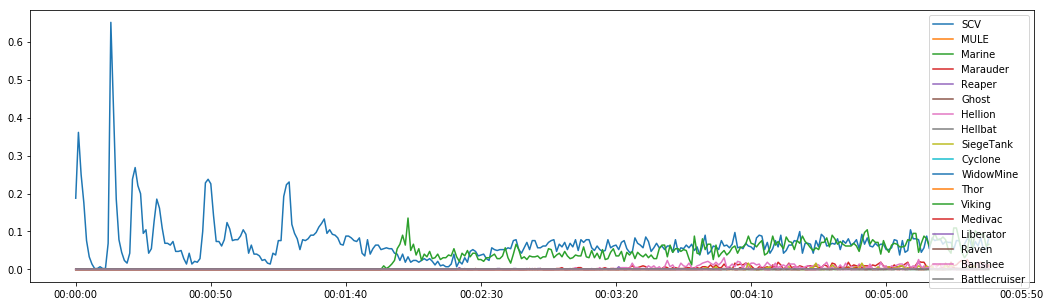

In [107]:
df.plot(figsize=(18,5))
plt.show()

In [110]:
win_df = to.train_orders()

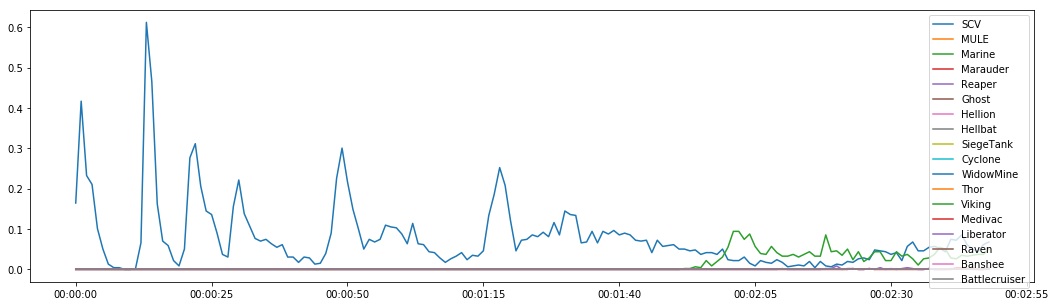

In [111]:
win_df.plot(figsize=(18,5))
plt.show()

In [112]:
loss_df = to.train_orders(winners=False)

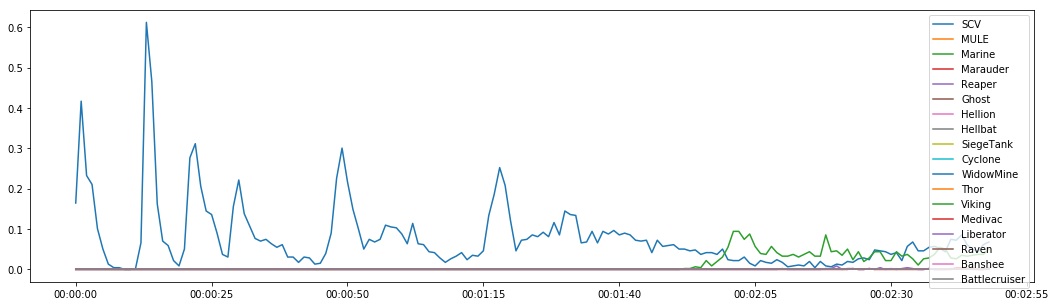

In [113]:
loss_df.plot(figsize=(18,5))
plt.show()

In [114]:
zerg_to = TrainingOrders('Zerg', datasetfiles)

In [115]:
zerg_df = zerg_to.train_orders()

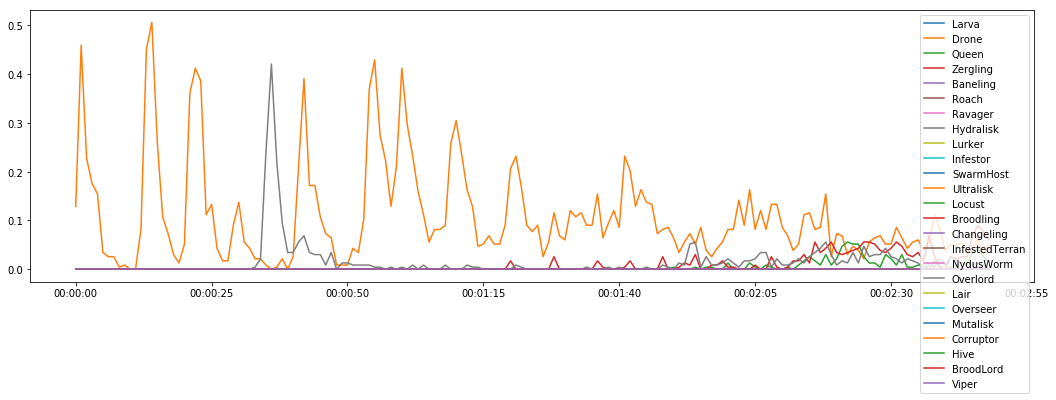

In [116]:
zerg_df.plot(figsize=(18,5))
plt.show()

In [117]:
protos = TrainingOrders('Protoss', datasetfiles)

In [118]:
protoss_df = protos.train_orders()

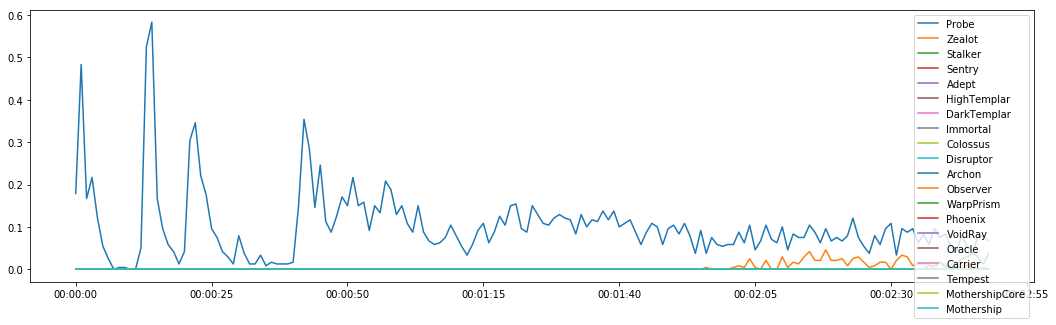

In [119]:
protoss_df.plot(figsize=(18,5))
plt.show()